In [51]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import great_tables as GT
from plottable import ColumnDefinition, Table
from plottable.cmap import normed_cmap
from plottable.formatters import decimal_to_percent
from plottable.plots import circled_image # image
from matplotlib.colors import LinearSegmentedColormap



In [24]:
seasonStats = pd.read_csv('model_data/merged_season_data.csv',sep=',')
#seasonStats = seasonStats[seasonStats['competition_name'] == 'Jupiler Pro League']





Strikers = seasonStats[seasonStats['primary_position_group'] == 'Centre Forward']

In [25]:
model_data = pd.read_csv('model_data/model_performance_summary.csv')
relevant_model_data = model_data[model_data['position'] == 'Centre Forward']


In [26]:
import ast
features = ast.literal_eval(relevant_model_data['top_features_raw'].values[0])

In [27]:
features2 = [x.replace('_improvement','') for x in features]
features2

['player_season_box_cross_ratio',
 'player_season_obv_90',
 'player_season_counterpressure_regains_90',
 'Elo',
 'player_season_penalty_wins_90',
 'player_season_through_balls_90',
 'player_season_pressured_long_balls_90',
 'player_season_obv_shot_90',
 'player_season_minutes',
 'player_season_obv_pass_90',
 'player_season_starting_appearances',
 'player_season_deep_completions_90']

In [37]:
Strikers2 = Strikers[['player_name','season_name','team_name','competition_name','birth_date']+features]

minutes = Strikers[['player_name','season_name','team_name','player_season_minutes']]

if 'player_season_minutes' not in Strikers2.columns:
    Strikers2 = Strikers2.merge(minutes,on=['player_name','season_name','team_name'])
else:
    pass


minute_threshold = 600
Strikers2 = Strikers2[Strikers2['player_season_minutes'] >= minute_threshold]


In [116]:
from scipy.stats import zscore

for f in features:
    if 'ratio' in f:
        mean_val = Strikers2[f].mean(skipna=True)
        Strikers2[f] = Strikers2[f].fillna(mean_val)
    else:
        Strikers2[f] = Strikers2[f].fillna(0)

In [117]:
for f in features:
    Strikers2[f"{f}_z"] = zscore(Strikers2[f])

Strikers2['Player Index'] = Strikers2[[f"{f}_z" for f in features]].mean(axis=1)

/Users/adriaanmartiny/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1158: RuntimeWarning: invalid value encountered in subtract
  a_zero_mean = a - mean
/Users/adriaanmartiny/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1158: RuntimeWarning: invalid value encountered in subtract
  a_zero_mean = a - mean
/Users/adriaanmartiny/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1158: RuntimeWarning: invalid value encountered in subtract
  a_zero_mean = a - mean


In [ ]:
StrikersTable = Strikers2[Strikers2.season_name == season].sort_values('Player Index',ascending=False).head(20)

cols_new = [x.replace('player_season_','').replace('_z',' (Z)').replace('_',' ').title() for x in StrikersTable.columns]
cols_new = [x.replace('90','(per 90)') for x in cols_new]

StrikersTable = StrikersTable.rename(columns=dict(zip(StrikersTable.columns,cols_new)))
no_z = [x for x in StrikersTable.columns if '(Z)' not in x]

StrikersTable_noZ = StrikersTable[no_z]


In [119]:
features_table

['Box Cross Ratio Improvement',
 'Obv (per 90) Improvement',
 'Counterpressure Regains (per 90) Improvement',
 'Elo',
 'Penalty Wins (per 90) Improvement',
 'Through Balls (per 90) Improvement',
 'Pressured Long Balls (per 90) Improvement',
 'Obv Shot (per 90) Improvement',
 'Minutes',
 'Obv Pass (per 90) Improvement',
 'Starting Appearances Improvement',
 'Deep Completions (per 90) Improvement']

In [120]:

id_vars = ['Player Name','Season Name','Team Name','Competition Name','Birth Date']

features_table = [x for x in StrikersTable_noZ.columns if x not in id_vars]
features_table = [x for x in features_table if x != 'Player Index']

for f in features_table:
    StrikersTable_noZ[f] = StrikersTable_noZ[f].astype(float).round(2)

StrikersTable_noZ['Player Index'] = StrikersTable_noZ['Player Index'].round(2)

for f in features_table:
    StrikersTable_noZ[f] = StrikersTable_noZ[f].astype(str).replace('inf','-')


def custom_split(text: str) -> str:
    if not isinstance(text, str):
        return text
    
    words = text.split()
    n = len(words)

    if n ==2:
        return words[0] + "\n" + " ".join(words[1:])
    elif n >= 3:
        return " ".join(words[:2]) + "\n" + " ".join(words[2:])
    else:
        return text  # leave 1–2 words untouched
    
StrikersTable_noZ["Player Name"] = StrikersTable_noZ["Player Name"].apply(custom_split)
StrikersTable_noZ['Season Name'] = StrikersTable_noZ['Season Name'].apply(custom_split)
StrikersTable_noZ['Team Name'] = StrikersTable_noZ['Team Name'].apply(custom_split)
StrikersTable_noZ['Competition Name'] = StrikersTable_noZ['Competition Name'].apply(custom_split)


/var/folders/gr/grh3033930d1vhxcd4gdjy6m0000gn/T/ipykernel_13558/2846351999.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  StrikersTable_noZ[f] = StrikersTable_noZ[f].astype(float).round(2)
/var/folders/gr/grh3033930d1vhxcd4gdjy6m0000gn/T/ipykernel_13558/2846351999.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  StrikersTable_noZ[f] = StrikersTable_noZ[f].astype(float).round(2)
/var/folders/gr/grh3033930d1vhxcd4gdjy6m0000gn/T/ipykernel_13558/2846351999.py:7: SettingWithCopyWarning: 
A value is tryi

In [121]:
from gent_colors import colorDict


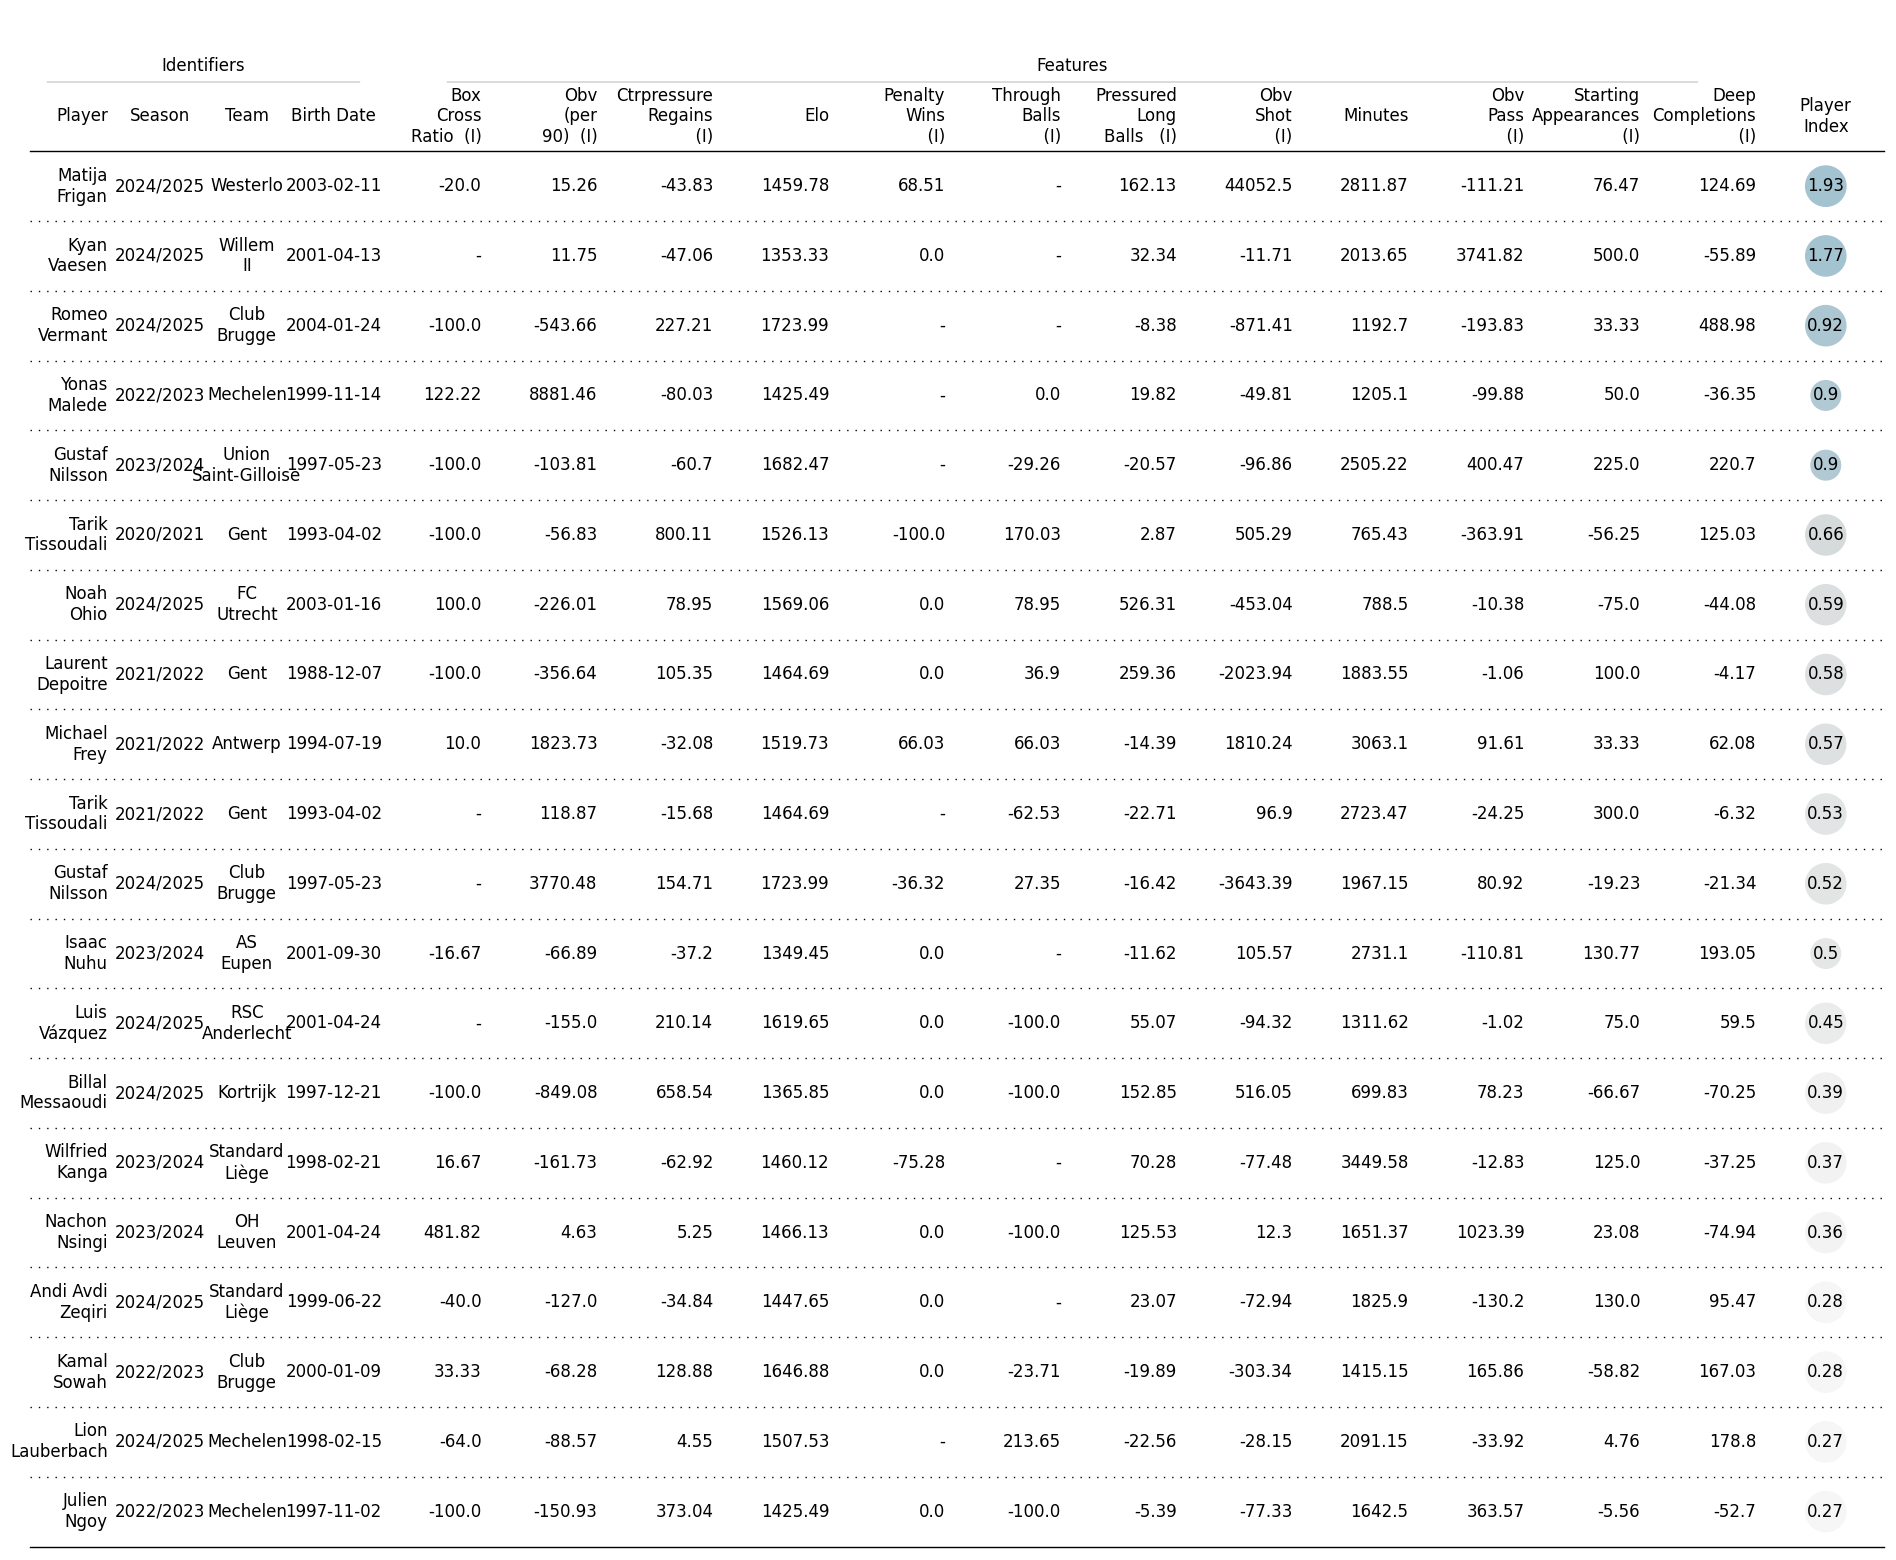

In [125]:
fig, ax = plt.subplots(figsize=(24,20))
cmap = LinearSegmentedColormap.from_list(
    name="bugw", colors=["white",colorDict["HEX"]['lightgrey'],colorDict['HEX']['midgrey'],colorDict['HEX']['retroblue']], N=256
)
col_defs = (
    [
        ColumnDefinition(
            name="Player Name",
            width=0.75,
            group="Identifiers",
            title = "Player"
        ),
        ColumnDefinition(
            name="Season Name",
            width=0.75,
            textprops={
                "ha": "center",
            },
            group="Identifiers",
            title='Season'
        ),
        ColumnDefinition(
            name="Team Name",
            width=0.75,
             textprops={
                "ha": "center",
            },
            group="Identifiers",
            title='Team'
        ),
         ColumnDefinition(
            name="Birth Date",
            width=0.75,
             textprops={
                "ha": "center",
            },
            group="Identifiers",
            title='Birth Date'
        ),
    ]
    + [
        ColumnDefinition(
            name=col,
            title=col.replace(" ", "\n", 2).replace("Improvement"," (I)").replace("(per 90)","").replace("Counter",'Ctr'),
            group="Features",
        )
        for col in features_table
    ]
+
[
        ColumnDefinition(
            name="Player Index",
            title="Player Index".replace(" ", "\n", 1),
            textprops={
                "ha": "center",
                "bbox": {"boxstyle": "circle", "pad": 0.10},
            },
            cmap=normed_cmap(StrikersTable_noZ["Player Index"], cmap=cmap, num_stds=1),
        )
    ]
)

plt.rcParams["font.family"] = ["DejaVu Sans"]
plt.rcParams["savefig.bbox"] = "tight"


table = Table(
    StrikersTable_noZ.drop(columns=['Competition Name']),
    column_definitions=col_defs,
    index_col='Player Name',
    row_dividers=True,
    footer_divider=True,
    ax=ax,
    textprops={"fontsize": 12},
    row_divider_kw={"linewidth": 1, "linestyle": (0, (1, 5))},
    col_label_divider_kw={"linewidth": 1, "linestyle": "-"},
    column_border_kw={"linewidth": 1, "linestyle": "-"},
)

fig.savefig("Exports/Feature_rank_table.pdf",dpi=300)
